In [2]:
%matplotlib inline

from qiskit import IBMQ, QuantumCircuit, execute, Aer
import csv
import random

Account Access

In [8]:

API_TOKEN = '7f744419bf02c5ad2935c5bad2d858f150f3793da866268cd5c0841bc531c8a72a4484d4c59bf3afa44c29e7859a875cf0634104707aa341424b662acd7c4655'

IBMQ.save_account(API_TOKEN)
IBMQ.load_account()
# each provider has multiple backends
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
#asking a provider for their 
print('\nThese are the backends available to use....\n')
print(provider.backends())

backend = provider.get_backend('ibmqx2')
print('\n\nBackend being used: ', backend)
print(backend.configuration().basis_gates)

configrc.store_credentials:WARNING:2020-04-25 18:45:40,972: Credentials already present. Set overwrite=True to overwrite.
ibmqfactory.load_account:WARNING:2020-04-25 18:45:41,286: Credentials are already in use. The existing account in the session will be replaced.



These are the backends available to use....

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]


Backend being used:  ibmqx2
['u1', 'u2', 'u3', 'cx', 'id']


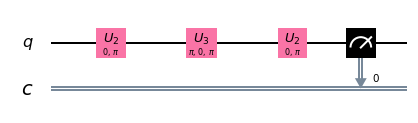

In [9]:
# Quantum circuit configuration
heads_circuit = QuantumCircuit(1,1)
tails_circuit = QuantumCircuit(1,1)

#  heads circuit config
heads_circuit.h(0)
heads_circuit.x(0)
heads_circuit.h(0)
heads_circuit.measure(range(1), range(1))

#  tails circuit config
tails_circuit.h(0)
tails_circuit.h(0)
tails_circuit.measure(range(1), range(1))

#  decompose our original quantum circuits to essex basis
qc_basis = heads_circuit.decompose()
qc_basis.draw(output = 'mpl')